Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/vinayakshanawad/meat-freshness-image-dataset
License(s): CC0-1.0
 69% 41.0M/59.4M [00:00<00:00, 65.6MB/s]
100% 59.4M/59.4M [00:00<00:00, 82.3MB/s]
Extracted vinayakshanawad/meat-freshness-image-dataset to /content/meat-freshness-image-dataset
Dataset URL: https://www.kaggle.com/datasets/crowww/meat-quality-assessment-based-on-deep-learning
License(s): Attribution 4.0 International (CC BY 4.0)
 97% 263M/270M [00:03<00:00, 96.8MB/s]
100% 270M/270M [00:03<00:00, 92.9MB/s]
Extracted crowww/meat-quality-assessment-based-on-deep-learning to /content/meat-quality-assessment-based-on-deep-learning
Using dataset directory: /content/meat-freshness-image-dataset/Meat Freshness.v1-new-dataset.multiclass
2.15.0
Detected class names: ['train', 'valid']
Found 2266 files belonging to 2 classes.
Using 1813 files for training.
Found 2266 files belonging to 2 classes.
Using 453 files for validation.
Class names from the datase

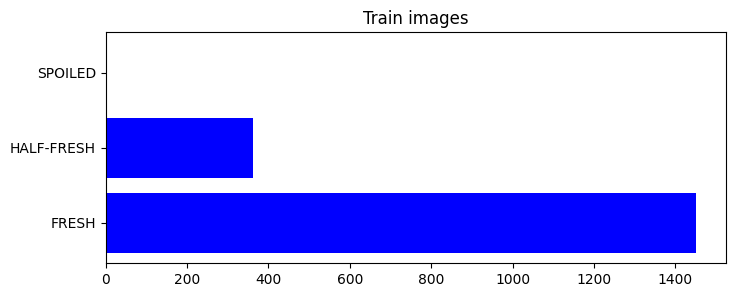

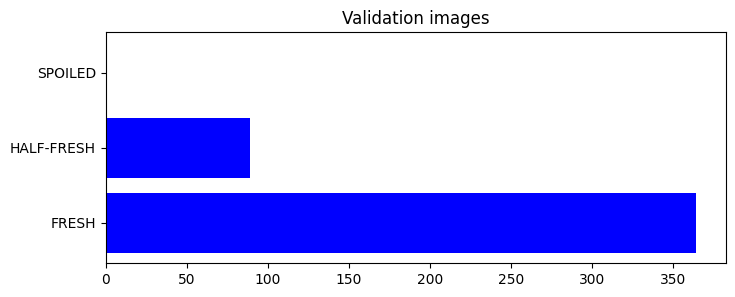

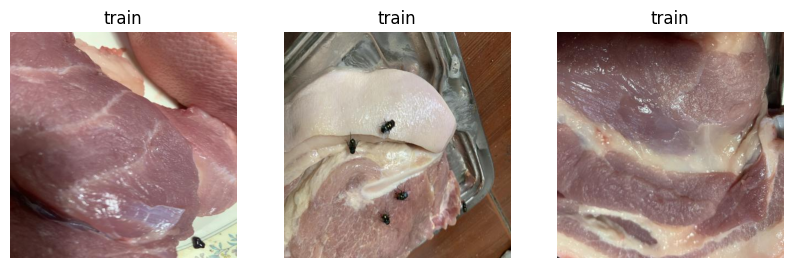

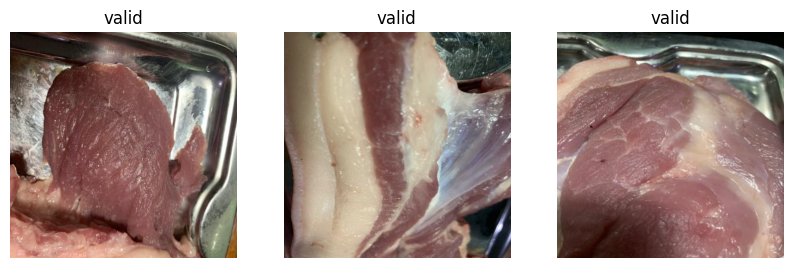

Epoch 1/20
57/57 [==============================] - 85s 1s/step - loss: 0.7376 - accuracy: 0.5190 - val_loss: 0.7819 - val_accuracy: 0.1965
Epoch 2/20
57/57 [==============================] - 79s 1s/step - loss: 0.7038 - accuracy: 0.5273 - val_loss: 0.7399 - val_accuracy: 0.1965
Epoch 3/20
57/57 [==============================] - 81s 1s/step - loss: 0.7063 - accuracy: 0.5152 - val_loss: 0.7403 - val_accuracy: 0.1965
Epoch 4/20
57/57 [==============================] - 76s 1s/step - loss: 0.6987 - accuracy: 0.5124 - val_loss: 0.7567 - val_accuracy: 0.1965
Epoch 5/20
57/57 [==============================] - 76s 1s/step - loss: 0.7010 - accuracy: 0.5207 - val_loss: 0.7427 - val_accuracy: 0.1965
Epoch 6/20
57/57 [==============================] - 76s 1s/step - loss: 0.7016 - accuracy: 0.5124 - val_loss: 0.7349 - val_accuracy: 0.1987
Epoch 7/20
57/57 [==============================] - 78s 1s/step - loss: 0.6972 - accuracy: 0.5383 - val_loss: 0.7242 - val_accuracy: 0.2318
Epoch 8/20
57/57 [==

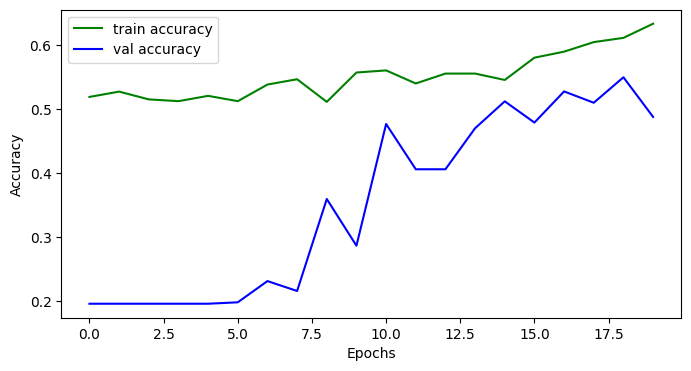

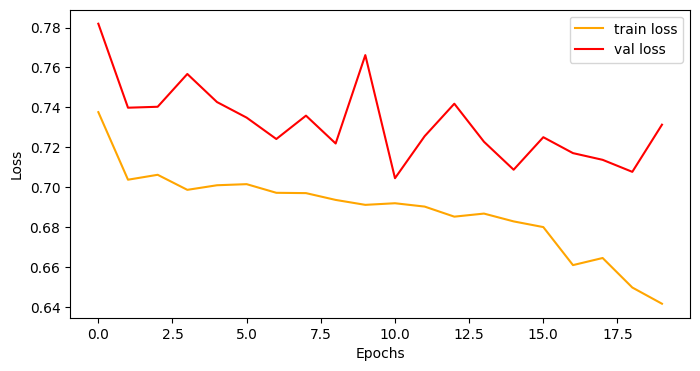

15/15 [==============================] - 7s 476ms/step - loss: 0.7314 - accuracy: 0.4879
validation accuracy: 0.49
validation loss: 0.73
1/1 [==============================] - 0s 261ms/step


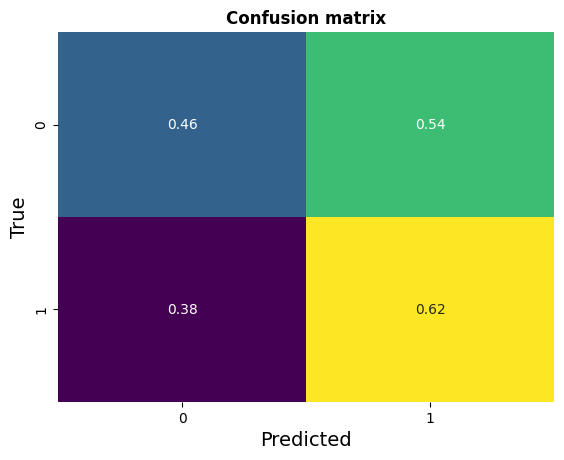

              precision    recall  f1-score   support

           0       0.83      0.46      0.59       364
           1       0.22      0.62      0.32        89

    accuracy                           0.49       453
   macro avg       0.52      0.54      0.46       453
weighted avg       0.71      0.49      0.54       453



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 54ms/step


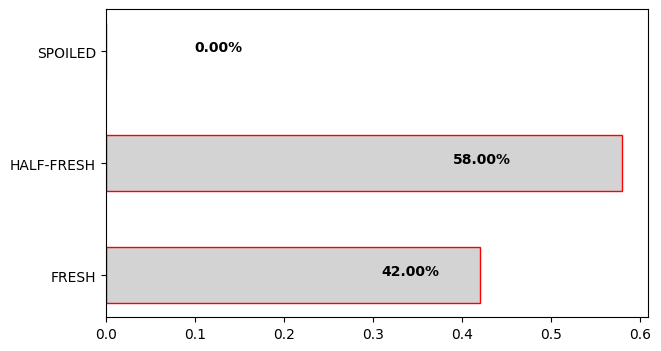

In [ ]:
# Step 1: Install the Kaggle package (if not already installed)
!pip install kaggle

# Step 2: Upload kaggle.json
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

# Step 3: Move kaggle.json to the proper directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Define the paths for the datasets
dataset_paths = [
    "vinayakshanawad/meat-freshness-image-dataset",
    "crowww/meat-quality-assessment-based-on-deep-learning"
]

# Download and extract all datasets
import zipfile

for dataset in dataset_paths:
    !kaggle datasets download -d {dataset} -p /content
    zip_file_path = f"/content/{dataset.split('/')[1]}.zip"
    extract_path = f"/content/{dataset.split('/')[1]}"

    # Unzip the dataset
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Extracted {dataset} to {extract_path}")

# Define paths for the extracted datasets
data_dirs = {
    "meat-freshness-image-dataset": "/content/meat-freshness-image-dataset/Meat Freshness.v1-new-dataset.multiclass",
    "meat-quality-assessment-based-on-deep-learning": "/content/meat-quality-assessment-based-on-deep-learning/meat-dataset"
}

# Choose the dataset you want to use (for now, we use the first dataset)
data_dir = data_dirs["meat-freshness-image-dataset"]
print(f"Using dataset directory: {data_dir}")

import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

print(tf.__version__)

# Settings
batch_size = 32
img_height = 128
img_width = 128

# Check the class names detected by TensorFlow
def get_class_names(data_dir):
    return sorted([dir_name for dir_name in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, dir_name))])

# Verify the dataset structure
print("Detected class names:", get_class_names(data_dir))

# Data Preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Get class names before data augmentation
class_names = train_ds.class_names
print("Class names from the dataset:", class_names)

# Check class distribution
def check_class_distribution(dataset, subset):
    class_count = Counter(np.concatenate([y for x, y in dataset], axis=0))
    print(f"{subset} set distribution: {class_count}")

check_class_distribution(train_ds, "training")
check_class_distribution(val_ds, "validation")

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# Exploratory Data Analysis (EDA)
def plot_distribution(y, title):
    a = Counter(y)
    y = ['FRESH', 'HALF-FRESH', 'SPOILED']
    x = [a[i] for i in range(3)]
    plt.figure(figsize=(8, 3))
    plt.barh(y, x, color='blue')
    plt.title(title)
    plt.show()

y_train = np.concatenate([y for x, y in train_ds], axis=0)
y_val = np.concatenate([y for x, y in val_ds], axis=0)
plot_distribution(y_train, title="Train images")
plot_distribution(y_val, title="Validation images")

# Sample images
for class_name in class_names:
    img_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(img_dir):  # Ensure it's a directory
        imgs = [os.path.join(img_dir, img) for img in os.listdir(img_dir) if img.endswith(('png', 'jpg', 'jpeg'))][:3]
        plt.figure(figsize=(10, 10))
        for i, img in enumerate(imgs):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(plt.imread(img))
            plt.title(class_name)
            plt.axis('off')
        plt.show()

# Model Training
# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Improved Model Architecture
num_classes = 3
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
class_weights = dict(enumerate(class_weights))

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                      min_delta=0.0001,
                                                      patience=5)

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=20,
                    class_weight=class_weights,
                    callbacks=[earlystop_callback])

# Model Evaluation
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']

# Accuracy plots
plt.figure(figsize=(8, 4))
plt.plot(train_acc, color='green', linestyle='-', label='train accuracy')
plt.plot(valid_acc, color='blue', linestyle='-', label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plots
plt.figure(figsize=(8, 4))
plt.plot(train_loss, color='orange', linestyle='-', label='train loss')
plt.plot(valid_loss, color='red', linestyle='-', label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss, acc = model.evaluate(val_ds, batch_size=batch_size)
print("validation accuracy:", round(acc, 2))
print("validation loss:", round(loss, 2))

# Confusion Matrix and Classification Report
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in val_ds:
    y_true.append(label_batch)
    preds = model.predict(image_batch)
    y_pred.append(np.argmax(preds, axis=-1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis=0)
predicted_labels = tf.concat([item for item in y_pred], axis=0)

cm = confusion_matrix(correct_labels, predicted_labels, normalize='true')
sns.heatmap(cm, annot=True, cmap='viridis', cbar=None)
plt.title("Confusion matrix", fontweight='bold')
plt.ylabel("True", fontsize=14)
plt.xlabel("Predicted", fontsize=14)
plt.show()

print(classification_report(correct_labels, predicted_labels))

# Save Model and Predict on Single Image
model.save("meat_quality_cnn.h5")

def prediction(img):
    class_names = ['FRESH', 'HALF-FRESH', 'SPOILED']
    my_image = load_img(img, target_size=(img_height, img_width))
    my_image = img_to_array(my_image)
    my_image = np.expand_dims(my_image, 0)
    out = np.round(model.predict(my_image)[0], 2)
    fig = plt.figure(figsize=(7, 4))
    plt.barh(class_names, out, color='lightgray', edgecolor='red', linewidth=1, height=0.5)
    for index, value in enumerate(out):
        plt.text(value / 2 + 0.1, index, f"{100 * value:.2f}%", fontweight='bold')
    plt.show()

# Example prediction
img = os.path.join(data_dir, 'train/FRESH-859-_JPG.rf.823e62717c79d4bfeffab4bcb5b0f0dc.jpg')  # Update this path if needed
prediction(img)
